In [2]:
import pandas as pd
caracteristiques = pd.read_csv('carcteristiques-2022.csv', sep=";")
lieux = pd.read_csv('lieux-2022.csv', sep=";")

print("Caracteristiques columns:", caracteristiques.columns)
print("Lieux columns:", lieux.columns)

Caracteristiques columns: Index(['Accident_Id', 'jour', 'mois', 'an', 'hrmn', 'lum', 'dep', 'com', 'agg',
       'int', 'atm', 'col', 'adr', 'lat', 'long'],
      dtype='object')
Lieux columns: Index(['Num_Acc', 'catr', 'voie', 'v1', 'v2', 'circ', 'nbv', 'vosp', 'prof',
       'pr', 'pr1', 'plan', 'lartpc', 'larrout', 'surf', 'infra', 'situ',
       'vma'],
      dtype='object')


C:\Users\trist\AppData\Local\Temp\ipykernel_20440\2142785995.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  lieux = pd.read_csv('lieux-2022.csv', sep=";")


In [3]:
lieux.rename(columns={'Num_Acc':'Accident_Id'}, inplace= True)
print("Lieux columns:", lieux.columns)

Lieux columns: Index(['Accident_Id', 'catr', 'voie', 'v1', 'v2', 'circ', 'nbv', 'vosp',
       'prof', 'pr', 'pr1', 'plan', 'lartpc', 'larrout', 'surf', 'infra',
       'situ', 'vma'],
      dtype='object')


In [4]:
lieux_caracteristiques_data = pd.merge(caracteristiques, lieux, on='Accident_Id', how='inner')

In [5]:
lieux_caracteristiques_data.columns

Index(['Accident_Id', 'jour', 'mois', 'an', 'hrmn', 'lum', 'dep', 'com', 'agg',
       'int', 'atm', 'col', 'adr', 'lat', 'long', 'catr', 'voie', 'v1', 'v2',
       'circ', 'nbv', 'vosp', 'prof', 'pr', 'pr1', 'plan', 'lartpc', 'larrout',
       'surf', 'infra', 'situ', 'vma'],
      dtype='object')

In [6]:
usagers = pd.read_csv("usagers-2022.csv",sep=";")
vehicules = pd.read_csv("vehicules-2022.csv", sep=';')

In [7]:
lieux_caracteristiques_data.rename(columns={'Accident_Id':'Num_Acc'}, inplace= True)

In [8]:
usagers = pd.read_csv("usagers-2022.csv",sep=";")

In [9]:
# Merge the two DataFrames on 'Num_Acc'
merged_data = pd.merge(lieux_caracteristiques_data, usagers, on='Num_Acc', how='inner')

# Group by 'Num_Acc' and count the number of rows for each group (i.e., the number of persons per accident)
persons_per_accident = merged_data.groupby('Num_Acc').size().reset_index(name='nb_of_persons')

# Merge the count back to the original 'lieux_caracteristiques_data' DataFrame
lieux_caracteristiques_data = pd.merge(lieux_caracteristiques_data, persons_per_accident, on='Num_Acc', how='left')

# Display the resulting DataFrame
print(lieux_caracteristiques_data[['Num_Acc', 'nb_of_persons']])

            Num_Acc  nb_of_persons
0      202200000001              2
1      202200000002              2
2      202200000003              2
3      202200000004              2
4      202200000005              2
...             ...            ...
55297  202200055298              2
55298  202200055299              1
55299  202200055300              1
55300  202200055301              3
55301  202200055302              2

[55302 rows x 2 columns]


In [10]:
lieux_caracteristiques_data.describe()

Num_Acc          jour          mois       an           lum   
count  5.530200e+04  55302.000000  55302.000000  55302.0  55302.000000  \
mean   2.022000e+11     15.607971      6.588514   2022.0      1.927308   
std    1.596446e+04      8.719319      3.332152      0.0      1.490073   
min    2.022000e+11      1.000000      1.000000   2022.0     -1.000000   
25%    2.022000e+11      8.000000      4.000000   2022.0      1.000000   
50%    2.022000e+11     15.000000      7.000000   2022.0      1.000000   
75%    2.022000e+11     23.000000      9.000000   2022.0      3.000000   
max    2.022001e+11     31.000000     12.000000   2022.0      5.000000   

                agg           int           atm           col          catr   
count  55302.000000  55302.000000  55302.000000  55302.000000  55302.000000  \
mean       1.633539      2.063705      1.587212      4.007522      3.364309   
std        0.481842      1.983497      1.673828      1.980689      1.246244   
min        1.000000     -1.000000     -1.000000     -1.000000      1.000000   
25%        1.000000      1.000000      1.000000      3.000000      3.000000   
50%        2.000000      1.000000      1.000000      3.000000      3.000000   
75%        2.000000      2.000000      1.000000      6.000000      4.000000   
max        2.000000      9.000000      9.000000      7.000000      9.000000   

                 v1          circ          vosp          prof          plan   
count  55302.000000  55302.000000  55302.000000  55302.000000  55302.000000  \
mean      -0.175111      1.807511      0.230552      1.234838      1.312538   
std        0.397916      0.901046      0.691514      0.544126      0.687786   
min       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
25%        0.000000      2.000000      0.000000      1.000000      1.000000   
50%        0.000000      2.000000      0.000000      1.000000      1.000000   
75%        0.000000      2.000000      0.000000      1.000000      1.000000   
max        3.000000      4.000000      3.000000      4.000000      4.000000   

               surf         infra          situ           vma  nb_of_persons  
count  55302.000000  55302.000000  55302.000000  55302.000000   55302.000000  
mean       1.246266      0.779610      1.636812     58.294239       2.290369  
std        0.858237      2.157695      1.592397     25.106518       1.235445  
min       -1.000000     -1.000000     -1.000000     -1.000000       1.000000  
25%        1.000000      0.000000      1.000000     50.000000       2.000000  
50%        1.000000      0.000000      1.000000     50.000000       2.000000  
75%        1.000000      0.000000      1.000000     80.000000       3.000000  
max        9.000000      9.000000      8.000000    700.000000      39.000000

In [11]:
vehicules = pd.read_csv("vehicules-2022.csv",sep=";")

In [12]:
# Merge the two DataFrames on 'Num_Acc'
merged_data = pd.merge(lieux_caracteristiques_data, vehicules, on='Num_Acc', how='inner')

# Group by 'Num_Acc' and count the number of rows for each group (i.e., the number of vehicles per accident)
vehicles_per_accident = merged_data.groupby('Num_Acc').size().reset_index(name='nb_of_vehicles')

# Merge the count back to the original 'lieux_caracteristiques_data' DataFrame
lieux_caracteristiques_data = pd.merge(lieux_caracteristiques_data, vehicles_per_accident, on='Num_Acc', how='left')

# Display the resulting DataFrame
print(lieux_caracteristiques_data[['Num_Acc', 'nb_of_vehicles']])

            Num_Acc  nb_of_vehicles
0      202200000001               2
1      202200000002               2
2      202200000003               2
3      202200000004               1
4      202200000005               2
...             ...             ...
55297  202200055298               1
55298  202200055299               1
55299  202200055300               1
55300  202200055301               2
55301  202200055302               2

[55302 rows x 2 columns]


In [13]:
lieux_caracteristiques_data.columns

Index(['Num_Acc', 'jour', 'mois', 'an', 'hrmn', 'lum', 'dep', 'com', 'agg',
       'int', 'atm', 'col', 'adr', 'lat', 'long', 'catr', 'voie', 'v1', 'v2',
       'circ', 'nbv', 'vosp', 'prof', 'pr', 'pr1', 'plan', 'lartpc', 'larrout',
       'surf', 'infra', 'situ', 'vma', 'nb_of_persons', 'nb_of_vehicles'],
      dtype='object')

In [14]:
lieux_caracteristiques_data['long'] = pd.to_numeric(lieux_caracteristiques_data['long'].str.replace(',', '.'), errors='coerce')

In [15]:

lieux_caracteristiques_data['long'] = lieux_caracteristiques_data['long'].astype(float)

In [16]:
lieux_caracteristiques_data['lat'] = pd.to_numeric(lieux_caracteristiques_data['lat'].str.replace(',', '.'), errors='coerce')

In [17]:
lieux_caracteristiques_data['lat'] = lieux_caracteristiques_data['lat'].astype(float)

In [18]:
import plotly.express as px

# Assuming you have a DataFrame named 'df' with the specified columns
# Replace 'df' with the actual name of your DataFrame

# Create a scattermapbox plot
center_lat = 46.6031  # Center of France
center_long = 1.8883  # Center of France
zoom_level = 5  # Adjust the zoom level as needed

# Create a scattermapbox plot
# Create a scattermapbox plot
fig = px.scatter_mapbox(
    lieux_caracteristiques_data,
    lat='lat',
    lon='long',
    color='nb_of_persons',
    size='nb_of_vehicles',
    hover_data=['vma', 'nb_of_persons', 'nb_of_vehicles'],
    zoom=zoom_level,
    center={'lat': center_lat, 'lon': center_long}
)

# Update layout to use mapbox style 'carto-positron'
fig.update_layout(mapbox_style="carto-positron")

# Define the geographical bounds of France
fig.update_geos(fitbounds="locations", visible=False, showcoastlines=False)

# Show the plot
fig.show()


In [19]:
import pandas as pd
import plotly.express as px

# Assuming your DataFrame is named 'lieux_caracteristiques_data'
# Replace 'lieux_caracteristiques_data' with the actual name of your DataFrame

# Map the numerical labels to descriptive categories
lum_mapping = {
    1: 'Plein jour',
    2: 'Crépuscule ou aube',
    3: 'Nuit sans éclairage public',
    4: 'Nuit avec éclairage public non allumé',
    5: 'Nuit avec éclairage public allumé'
}

# Apply the mapping to create a new column 'lum_category'
lieux_caracteristiques_data['lum_category'] = lieux_caracteristiques_data['lum'].map(lum_mapping)

# Group by 'lum_category' and count the number of accidents
accident_count = lieux_caracteristiques_data['lum_category'].value_counts().reset_index()
accident_count.columns = ['lum_category', 'accident_count']

# Create a bar chart using Plotly Express
fig = px.bar(
    accident_count,
    x='lum_category',
    y='accident_count',
    color='lum_category',
    title='Number of Accidents for Each Lighting Condition',
    labels={'accident_count': 'Number of Accidents', 'lum_category': 'Lighting Conditions'},
)

# Show the plot
fig.show()


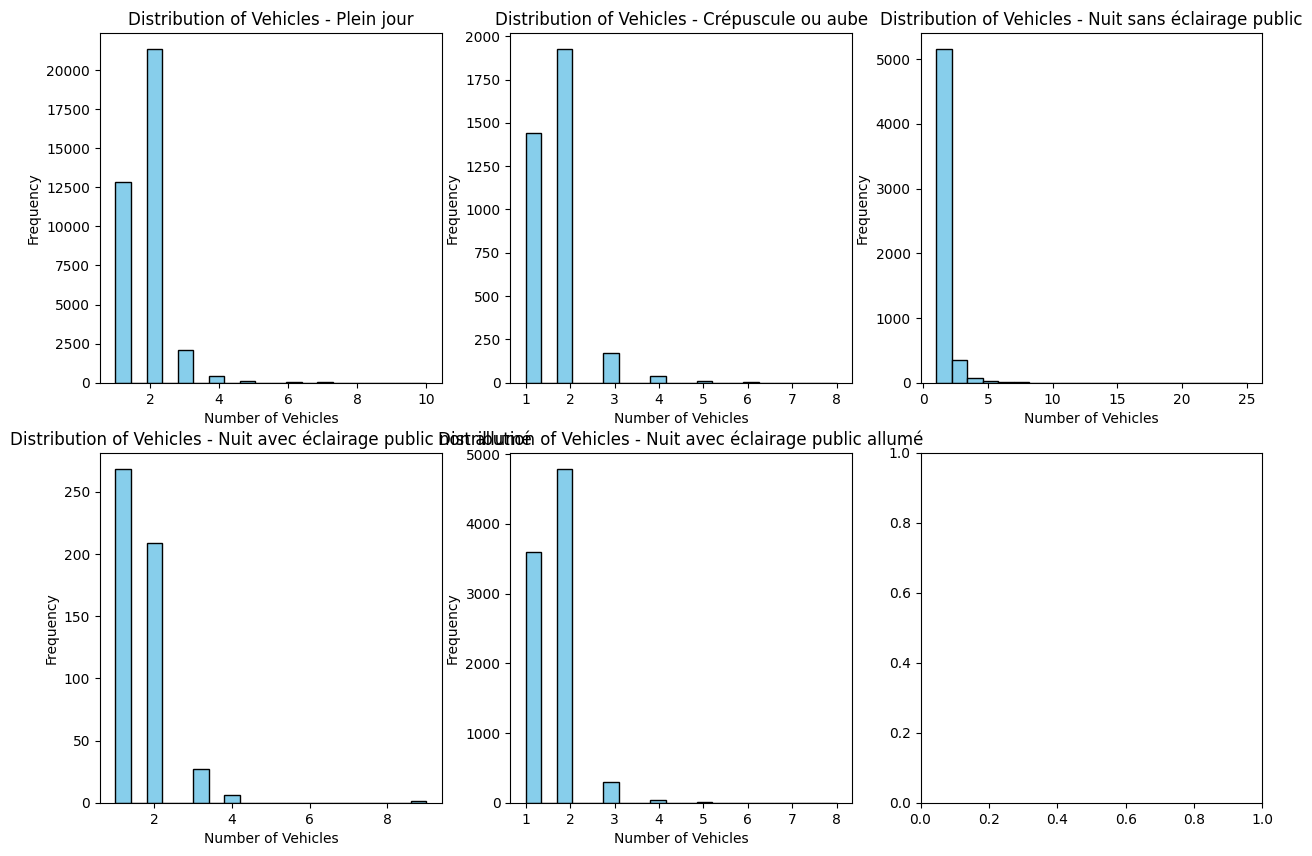

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'lieux_caracteristiques_data'
# Replace 'lieux_caracteristiques_data' with the actual name of your DataFrame

# Map the numerical labels to descriptive categories
lum_mapping = {
    1: 'Plein jour',
    2: 'Crépuscule ou aube',
    3: 'Nuit sans éclairage public',
    4: 'Nuit avec éclairage public non allumé',
    5: 'Nuit avec éclairage public allumé'
}

# Apply the mapping to create a new column 'lum_category'
lieux_caracteristiques_data['lum_category'] = lieux_caracteristiques_data['lum'].map(lum_mapping)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Iterate through each 'lum' level and create a histogram in each subplot
for i, (level, category) in enumerate(lum_mapping.items()):
    # Filter data for the specific level
    level_data = lieux_caracteristiques_data[lieux_caracteristiques_data['lum'] == level]
    
    # Plotting a histogram for the current level
    axes[i].hist(level_data['nb_of_vehicles'], bins=20, color='skyblue', edgecolor='black')
    
    axes[i].set_title(f'Distribution of Vehicles - {category}')
    axes[i].set_xlabel('Number of Vehicles')
    axes[i].set_ylabel('Frequency')

# Adjust layout

plt.show()


In [21]:
import pandas as pd
import plotly.express as px

# Assuming your DataFrame is named 'lieux_caracteristiques_data'
# Replace 'lieux_caracteristiques_data' with the actual name of your DataFrame

# Mapping for 'surf' categories
surf_mapping = {
    -1: 'Non renseigné',
    1: 'Normale',
    2: 'Mouillée',
    3: 'Flaques',
    4: 'Inondée',
    5: 'Enneigée',
    6: 'Boue',
    7: 'Verglacée',
    8: 'Corps gras – huile',
    9: 'Autre'
}

# Apply the mapping to create a new column 'surf_category'
lieux_caracteristiques_data['surf_category'] = lieux_caracteristiques_data['surf'].map(surf_mapping)

# Group by 'surf_category' and count the number of accidents
surf_accident_count = lieux_caracteristiques_data['surf_category'].value_counts().reset_index()
surf_accident_count.columns = ['surf_category', 'accident_count']

# Create a bar chart using Plotly Express
fig = px.bar(
    surf_accident_count,
    x='surf_category',
    y='accident_count',
    color='surf_category',
    title='Number of Accidents for Each Surface Condition',
    labels={'accident_count': 'Number of Accidents', 'surf_category': 'Surface Condition'},
)

# Show the plot
fig.show()


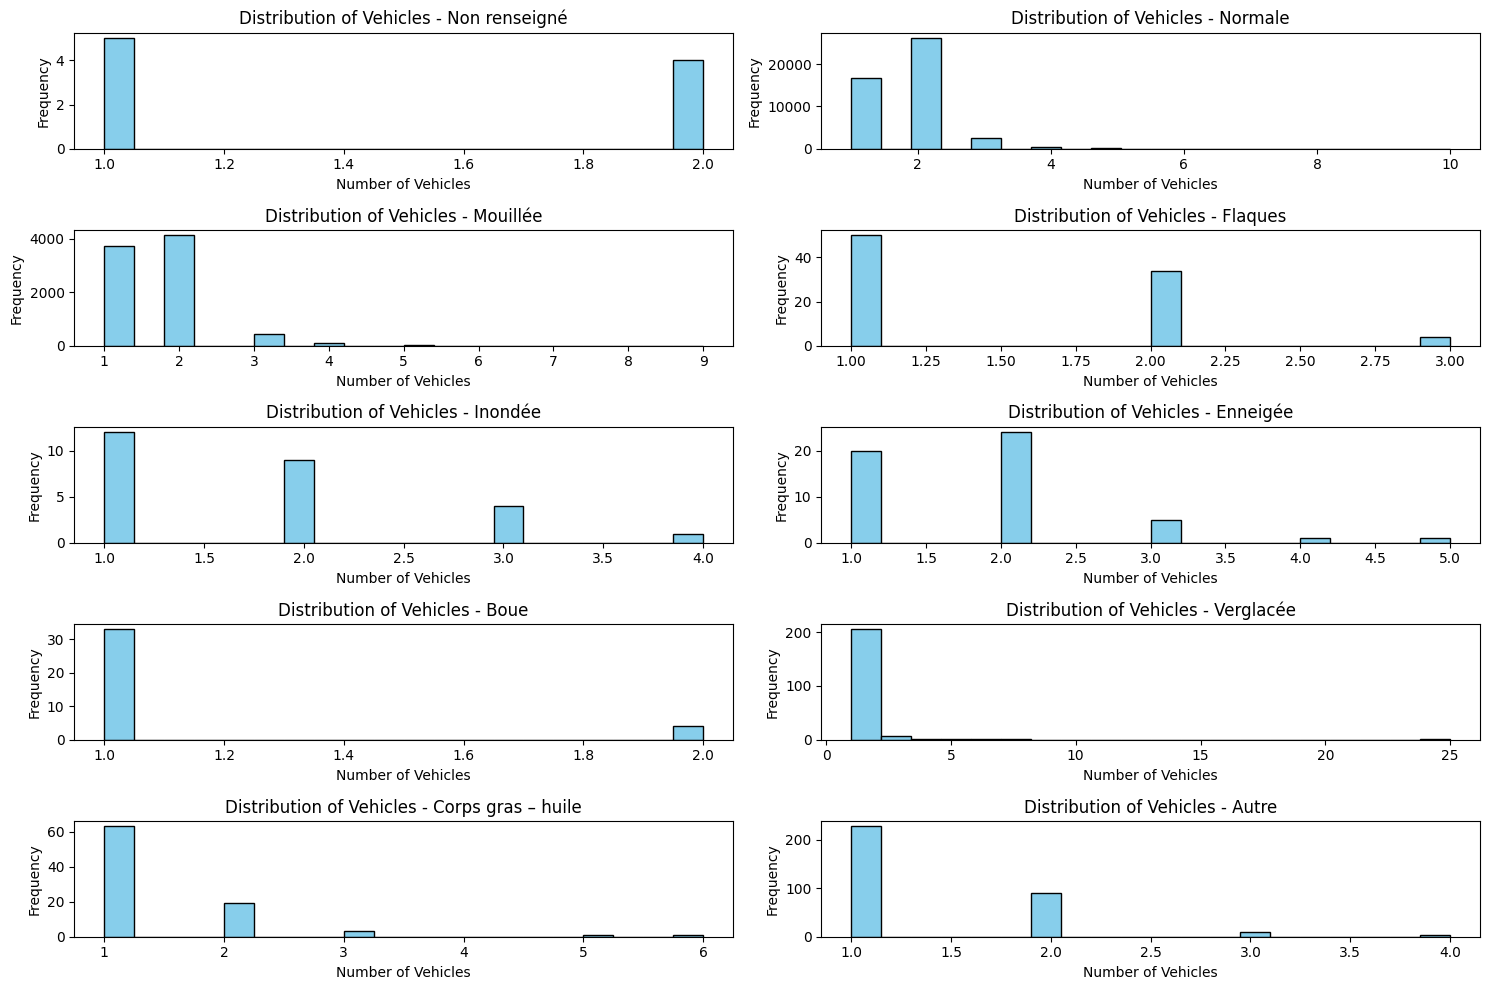

In [22]:
import pandas as pd
import plotly.express as px
import math

# Assuming your DataFrame is named 'lieux_caracteristiques_data'
# Replace 'lieux_caracteristiques_data' with the actual name of your DataFrame

# Mapping for 'surf' categories
surf_mapping = {
    -1: 'Non renseigné',
    1: 'Normale',
    2: 'Mouillée',
    3: 'Flaques',
    4: 'Inondée',
    5: 'Enneigée',
    6: 'Boue',
    7: 'Verglacée',
    8: 'Corps gras – huile',
    9: 'Autre'
}

# Apply the mapping to create a new column 'surf_category'
lieux_caracteristiques_data['surf_category'] = lieux_caracteristiques_data['surf'].map(surf_mapping)

# Create subplots
num_subplots = len(surf_mapping)
num_cols = 2
num_rows = math.ceil(num_subplots / num_cols)

# Create figure and axis objects
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Iterate through each 'surf' level and create a histogram in each subplot
for i, (level, category) in enumerate(surf_mapping.items()):
    # Filter data for the specific level
    level_data = lieux_caracteristiques_data[lieux_caracteristiques_data['surf'] == level]
    
    # Plotting a histogram for the current level
    axes[i].hist(level_data['nb_of_vehicles'], bins=20, color='skyblue', edgecolor='black')
    
    axes[i].set_title(f'Distribution of Vehicles - {category}')
    axes[i].set_xlabel('Number of Vehicles')
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


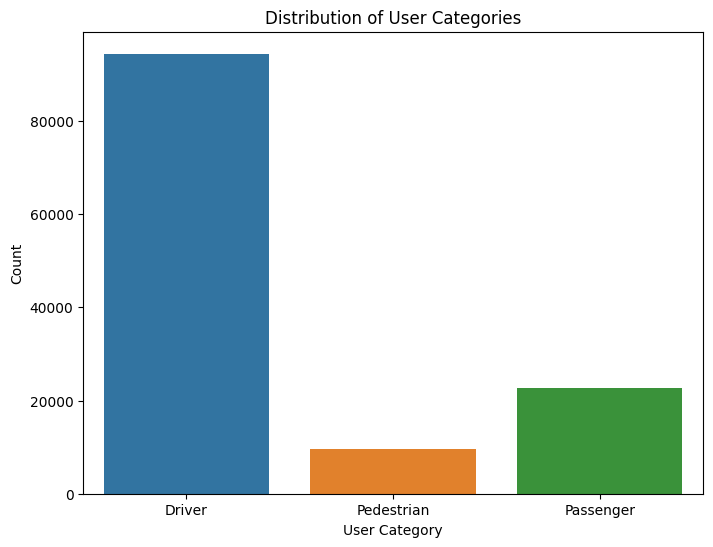

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'usagers' is your DataFrame
# Replace 'Your_Column_Name' with the actual name of your DataFrame column

# Mapping numeric values to labels for better readability
catu_labels = {
    1: 'Driver',
    2: 'Passenger',
    3: 'Pedestrian'
}

# Create a new column with mapped labels
usagers['catu_label'] = usagers['catu'].map(catu_labels)

plt.figure(figsize=(8, 6))
sns.countplot(x='catu_label', data=usagers)
plt.title('Distribution of User Categories')
plt.xlabel('User Category')
plt.ylabel('Count')
plt.show()


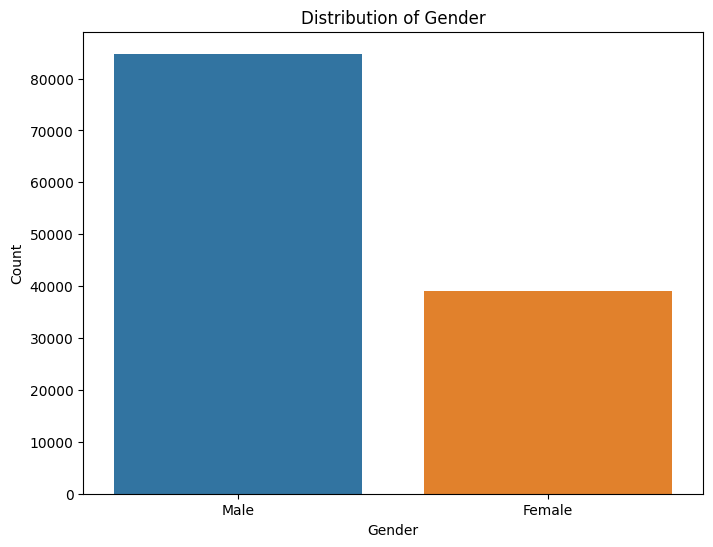

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'usagers' is your DataFrame
# Replace 'Your_Column_Name' with the actual name of your DataFrame column

# Mapping numeric values to labels for better readability
sexe_labels = {
    1: 'Male',
    2: 'Female'
}

# Create a new column with mapped labels
usagers['sexe_label'] = usagers['sexe'].map(sexe_labels)

plt.figure(figsize=(8, 6))
sns.countplot(x='sexe_label', data=usagers)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


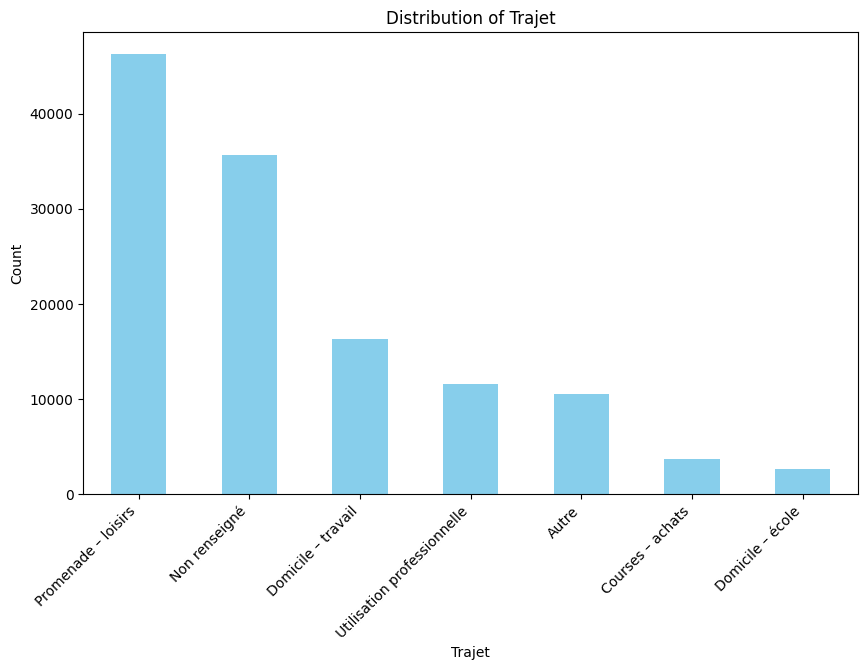

In [25]:
import matplotlib.pyplot as plt

# Assuming 'usagers' is your DataFrame
# Replace 'Your_Column_Name' with the actual name of your DataFrame column

# Mapping numeric values to labels for better readability
trajet_labels = {
    -1: 'Non renseigné',
    0: 'Non renseigné',
    1: 'Domicile – travail',
    2: 'Domicile – école',
    3: 'Courses – achats',
    4: 'Utilisation professionnelle',
    5: 'Promenade – loisirs',
    9: 'Autre'
}

# Create a new column with mapped labels
usagers['trajet_label'] = usagers['trajet'].map(trajet_labels)

# Count the occurrences of each label
trajet_counts = usagers['trajet_label'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
trajet_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Trajet')
plt.xlabel('Trajet')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


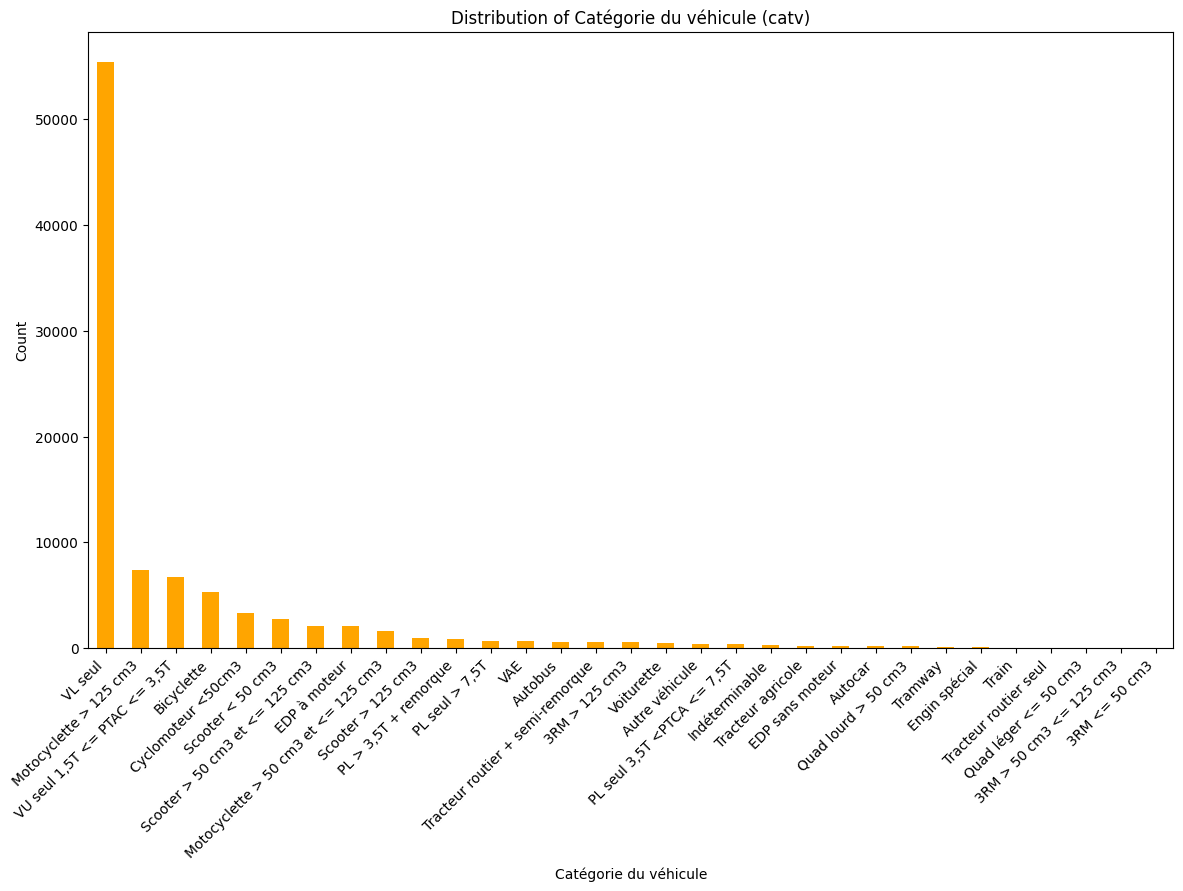

In [26]:
import matplotlib.pyplot as plt

# Assuming 'vehicules' is your DataFrame
# Replace 'Your_Column_Name' with the actual name of your DataFrame column

# Mapping numeric values to labels for better readability
catv_labels = {
    0: 'Indéterminable',
    1: 'Bicyclette',
    2: 'Cyclomoteur <50cm3',
    3: 'Voiturette',
    4: 'Scooter immatriculé',
    5: 'Motocyclette',
    6: 'Side-car',
    7: 'VL seul',
    8: 'VL + caravane',
    9: 'VL + remorque',
    10: 'VU seul 1,5T <= PTAC <= 3,5T',
    11: 'VU (10) + caravane',
    12: 'VU (10) + remorque',
    13: 'PL seul 3,5T <PTCA <= 7,5T',
    14: 'PL seul > 7,5T',
    15: 'PL > 3,5T + remorque',
    16: 'Tracteur routier seul',
    17: 'Tracteur routier + semi-remorque',
    18: 'Transport en commun',
    19: 'Tramway',
    20: 'Engin spécial',
    21: 'Tracteur agricole',
    30: 'Scooter < 50 cm3',
    31: 'Motocyclette > 50 cm3 et <= 125 cm3',
    32: 'Scooter > 50 cm3 et <= 125 cm3',
    33: 'Motocyclette > 125 cm3',
    34: 'Scooter > 125 cm3',
    35: 'Quad léger <= 50 cm3',
    36: 'Quad lourd > 50 cm3',
    37: 'Autobus',
    38: 'Autocar',
    39: 'Train',
    40: 'Tramway',
    41: '3RM <= 50 cm3',
    42: '3RM > 50 cm3 <= 125 cm3',
    43: '3RM > 125 cm3',
    50: 'EDP à moteur',
    60: 'EDP sans moteur',
    80: 'VAE',
    99: 'Autre véhicule'
}

# Create a new column with mapped labels
vehicules['catv_label'] = vehicules['catv'].map(catv_labels)

# Count the occurrences of each label
catv_counts = vehicules['catv_label'].value_counts()

# Create a bar plot
plt.figure(figsize=(14, 8))
catv_counts.plot(kind='bar', color='orange')
plt.title('Distribution of Catégorie du véhicule (catv)')
plt.xlabel('Catégorie du véhicule')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


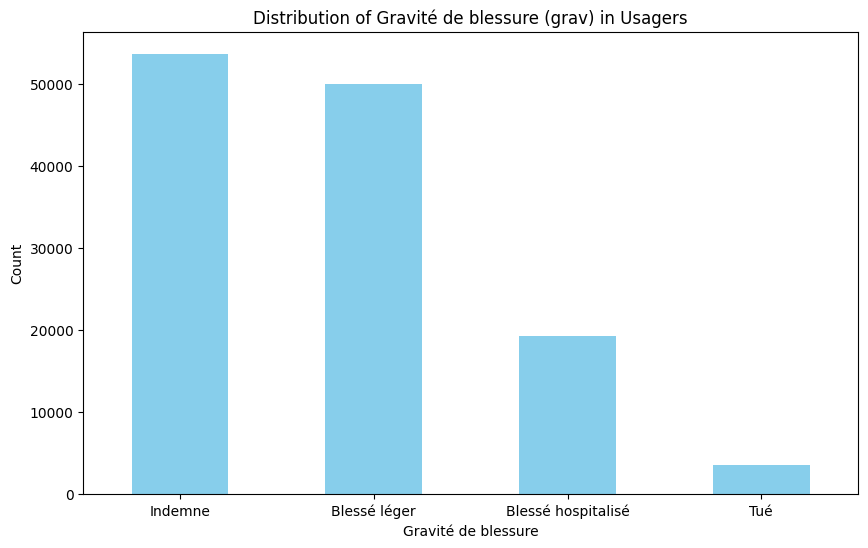

In [27]:
import matplotlib.pyplot as plt

# Assuming 'usagers' is your DataFrame
# Replace 'Your_Column_Name' with the actual name of your DataFrame column

# Mapping numeric values to labels for better readability
grav_labels = {
    1: 'Indemne',
    2: 'Tué',
    3: 'Blessé hospitalisé',
    4: 'Blessé léger'
}

# Create a new column with mapped labels
usagers['grav_label'] = usagers['grav'].map(grav_labels)

# Count the occurrences of each label
grav_counts = usagers['grav_label'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
grav_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Gravité de blessure (grav) in Usagers')
plt.xlabel('Gravité de blessure')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Show the plot
plt.show()


In [28]:
import pandas as pd

# Assuming 'usagers' and 'vehicules' are your DataFrames
# Replace 'Your_Column_Name' with the actual name of your DataFrame columns

# Merge the two DataFrames on 'id_vehicule'
merged_df = pd.merge(usagers, vehicules, on='id_vehicule')

# Filter the rows where 'grav' is equal to 2 (fatalities)
fatalities_df = merged_df[merged_df['grav'] == 2]

# Group by 'catv' and count the occurrences
fatality_count_by_catv = fatalities_df.groupby('catv').size().reset_index(name='fatality_count')

# Display the result
print(fatality_count_by_catv)


    catv  fatality_count
0     -1               1
1      0               9
2      1             215
3      2             121
4      3              28
5      7            2001
6     10             189
7     13              10
8     14              35
9     15              39
10    17              31
11    20               4
12    21              16
13    30              38
14    31              65
15    32              70
16    33             494
17    34              32
18    35               3
19    36              13
20    37               7
21    38               8
22    39               7
23    40               7
24    43              18
25    50              38
26    80              44
27    99               7


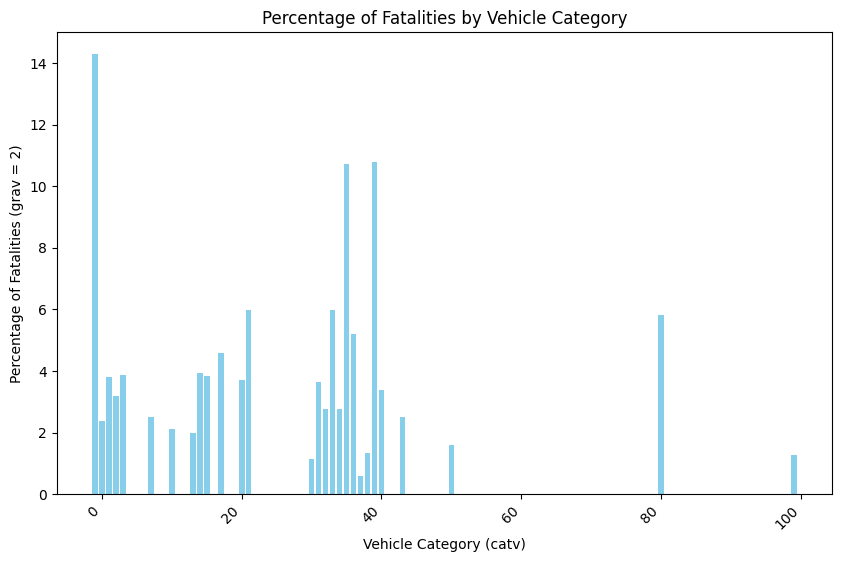

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'usagers' and 'vehicules' are your DataFrames
# Replace 'Your_Column_Name' with the actual name of your DataFrame columns

# Merge the two DataFrames on 'id_vehicule'
merged_df = pd.merge(usagers, vehicules, on='id_vehicule')

# Calculate the total count for each catv
total_count_by_catv = merged_df.groupby('catv').size().reset_index(name='total_count')

# Calculate the count of grav == 2 for each catv
fatality_count_by_catv = merged_df[merged_df['grav'] == 2].groupby('catv').size().reset_index(name='fatality_count')

# Merge the two counts DataFrames
merged_count_df = pd.merge(total_count_by_catv, fatality_count_by_catv, on='catv', how='left').fillna(0)

# Calculate the percentage
merged_count_df['fatality_percentage'] = (merged_count_df['fatality_count'] / merged_count_df['total_count']) * 100

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(merged_count_df['catv'], merged_count_df['fatality_percentage'], color='skyblue')
plt.xlabel('Vehicle Category (catv)')
plt.ylabel('Percentage of Fatalities (grav = 2)')
plt.title('Percentage of Fatalities by Vehicle Category')
plt.xticks(rotation=45, ha='right')
plt.show()


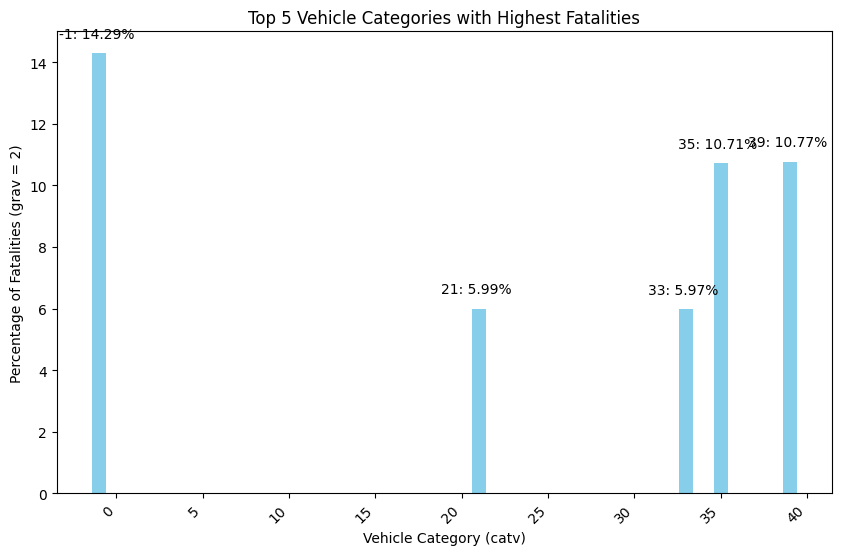

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'usagers' and 'vehicules' are your DataFrames
# Replace 'Your_Column_Name' with the actual name of your DataFrame columns

# Merge the two DataFrames on 'id_vehicule'
merged_df = pd.merge(usagers, vehicules, on='id_vehicule')

# Calculate the total count for each catv
total_count_by_catv = merged_df.groupby('catv').size().reset_index(name='total_count')

# Calculate the count of grav == 2 for each catv
fatality_count_by_catv = merged_df[merged_df['grav'] == 2].groupby('catv').size().reset_index(name='fatality_count')

# Merge the two counts DataFrames
merged_count_df = pd.merge(total_count_by_catv, fatality_count_by_catv, on='catv', how='left').fillna(0)

# Calculate the percentage
merged_count_df['fatality_percentage'] = (merged_count_df['fatality_count'] / merged_count_df['total_count']) * 100

# Get the top five categories with the highest fatality rates
top_five_categories = merged_count_df.nlargest(5, 'fatality_percentage')

# Plot the results for the top five categories
plt.figure(figsize=(10, 6))
bars = plt.bar(top_five_categories['catv'], top_five_categories['fatality_percentage'], color='skyblue')
plt.xlabel('Vehicle Category (catv)')
plt.ylabel('Percentage of Fatalities (grav = 2)')
plt.title('Top 5 Vehicle Categories with Highest Fatalities')
plt.xticks(rotation=45, ha='right')

# Add labels to the bars
for bar, label in zip(bars, top_five_categories['catv']):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.5,
             f'{label}: {bar.get_height():.2f}%', ha='center', color='black')

plt.show()


In [31]:
# Check the columns in 'usagers' DataFrame
print(usagers.columns)

# Check the columns in 'lieux_caracteristiques_data' DataFrame
print(lieux_caracteristiques_data.columns)


Index(['Num_Acc', 'id_usager', 'id_vehicule', 'num_veh', 'place', 'catu',
       'grav', 'sexe', 'an_nais', 'trajet', 'secu1', 'secu2', 'secu3', 'locp',
       'actp', 'etatp', 'catu_label', 'sexe_label', 'trajet_label',
       'grav_label'],
      dtype='object')
Index(['Num_Acc', 'jour', 'mois', 'an', 'hrmn', 'lum', 'dep', 'com', 'agg',
       'int', 'atm', 'col', 'adr', 'lat', 'long', 'catr', 'voie', 'v1', 'v2',
       'circ', 'nbv', 'vosp', 'prof', 'pr', 'pr1', 'plan', 'lartpc', 'larrout',
       'surf', 'infra', 'situ', 'vma', 'nb_of_persons', 'nb_of_vehicles',
       'lum_category', 'surf_category'],
      dtype='object')


In [32]:
usagers.shape

(126662, 20)

In [33]:


# Assuming you have 'usagers', 'lieux_caracteristiques_data', and 'vehicules' DataFrames

# Merge 'usagers' with 'lieux_caracteristiques_data' on 'Num_Acc'
merged_data = pd.merge(usagers, lieux_caracteristiques_data, on='Num_Acc', how='inner')


# Now, 'merged_data' contains the merged data from 'usagers', 'lieux_caracteristiques_data', and 'vehicules'


In [34]:
merged_data = pd.merge(merged_data, vehicules, on='id_vehicule', how='inner')

In [35]:
merged_data.columns

Index(['Num_Acc_x', 'id_usager', 'id_vehicule', 'num_veh_x', 'place', 'catu',
       'grav', 'sexe', 'an_nais', 'trajet', 'secu1', 'secu2', 'secu3', 'locp',
       'actp', 'etatp', 'catu_label', 'sexe_label', 'trajet_label',
       'grav_label', 'jour', 'mois', 'an', 'hrmn', 'lum', 'dep', 'com', 'agg',
       'int', 'atm', 'col', 'adr', 'lat', 'long', 'catr', 'voie', 'v1', 'v2',
       'circ', 'nbv', 'vosp', 'prof', 'pr', 'pr1', 'plan', 'lartpc', 'larrout',
       'surf', 'infra', 'situ', 'vma', 'nb_of_persons', 'nb_of_vehicles',
       'lum_category', 'surf_category', 'Num_Acc_y', 'num_veh_y', 'senc',
       'catv', 'obs', 'obsm', 'choc', 'manv', 'motor', 'occutc', 'catv_label'],
      dtype='object')

In [36]:
merged_data['grav'] = merged_data['grav'].replace({2: 4, 4: 2})


In [37]:
merged_data['grav'].describe()

count    126662.000000
mean          1.778994
std           0.809854
min          -1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           4.000000
Name: grav, dtype: float64

In [38]:
merged_data['vma'].describe()

count    126662.000000
mean         60.099233
std          26.054698
min          -1.000000
25%          50.000000
50%          50.000000
75%          80.000000
max         700.000000
Name: vma, dtype: float64

C:\Users\trist\AppData\Local\Temp\ipykernel_20440\1971886859.py:6: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



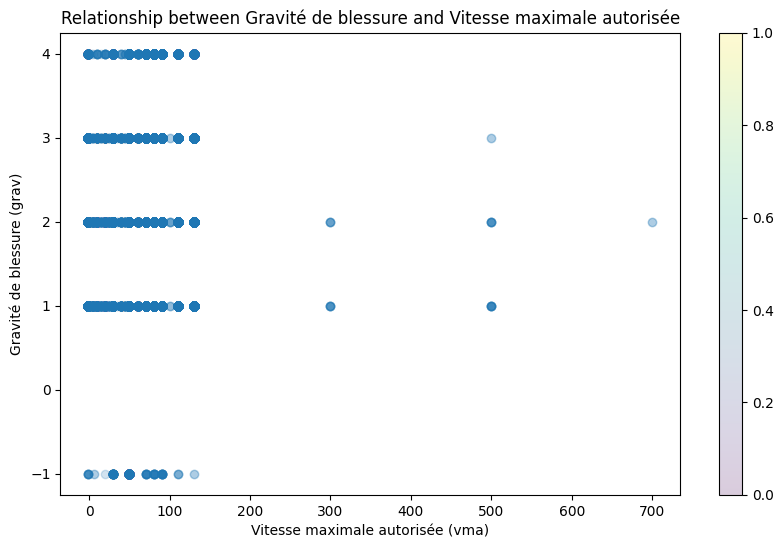

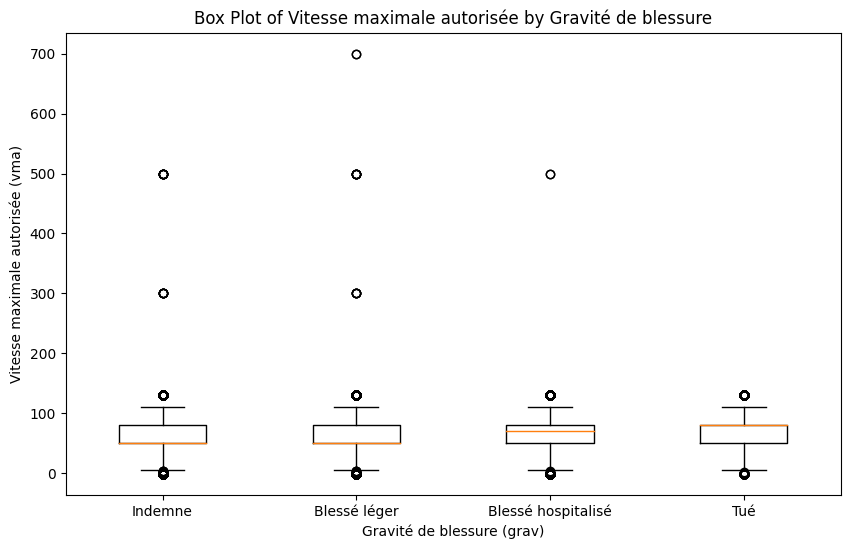

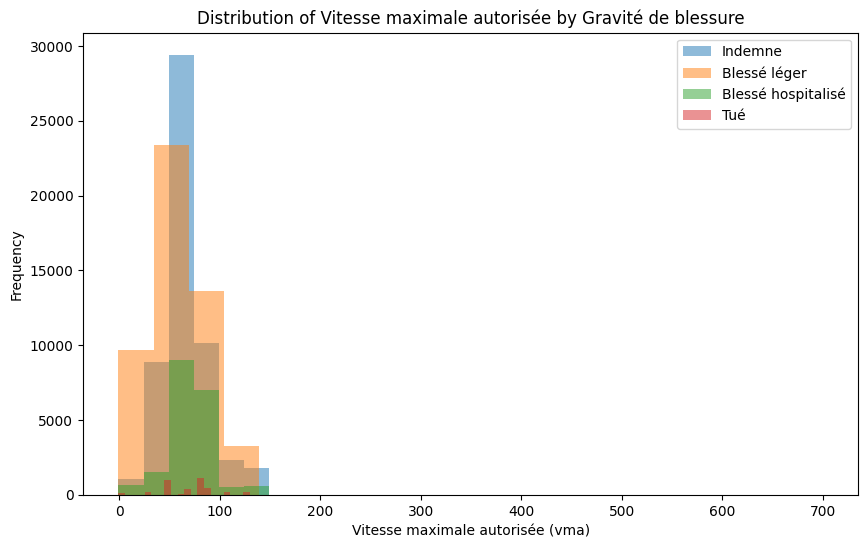

In [39]:
# Descriptive Statistics
statistics = merged_data.groupby('grav')['vma'].agg(['mean', 'median', 'std'])

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['vma'], merged_data['grav'], alpha=0.2, cmap='viridis')
plt.xlabel('Vitesse maximale autorisée (vma)')
plt.ylabel('Gravité de blessure (grav)')
plt.title('Relationship between Gravité de blessure and Vitesse maximale autorisée')
plt.colorbar()
plt.show()

# Box Plot
plt.figure(figsize=(10, 6))
plt.boxplot([merged_data[merged_data['grav'] == i]['vma'] for i in range(1, 5)], labels=['Indemne', 'Blessé léger', 'Blessé hospitalisé', 'Tué'])
plt.xlabel('Gravité de blessure (grav)')
plt.ylabel('Vitesse maximale autorisée (vma)')
plt.title('Box Plot of Vitesse maximale autorisée by Gravité de blessure')
plt.show()

# Histogram
plt.figure(figsize=(10, 6))
for grav, label in [(1, 'Indemne'), (2, 'Blessé léger'), (3, 'Blessé hospitalisé'), (4, 'Tué')]:
    grav_data = merged_data[merged_data['grav'] == grav]
    plt.hist(grav_data['vma'], bins=20, alpha=0.5, label=label)
plt.xlabel('Vitesse maximale autorisée (vma)')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Vitesse maximale autorisée by Gravité de blessure')
plt.show()

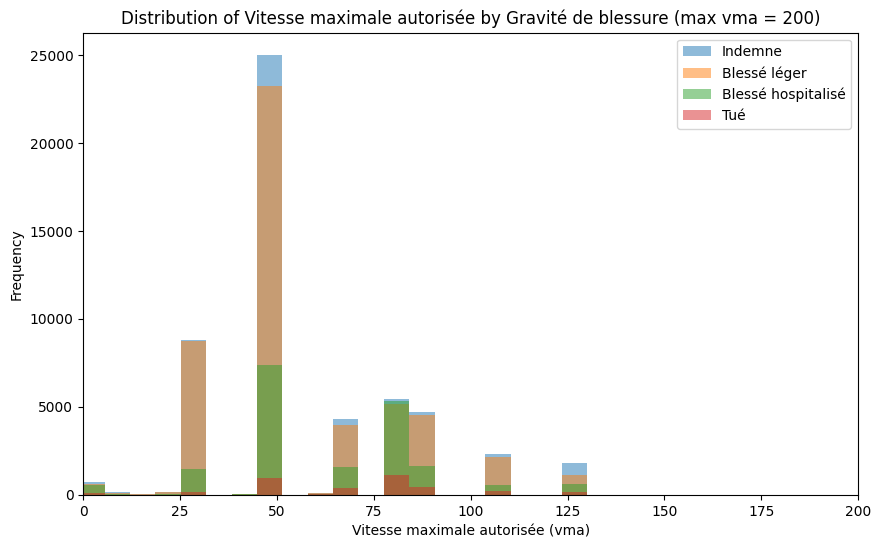

In [40]:
# Data Preparation
merged_data['vma'] = pd.to_numeric(merged_data['vma'], errors='coerce')
merged_data = merged_data.dropna(subset=['vma', 'grav'])  # Remove rows with missing values
merged_data = merged_data[merged_data['vma'] <= 200]  # Filter vma values less than or equal to 200

# Create a histogram
plt.figure(figsize=(10, 6))
for grav, label in [(1, 'Indemne'), (2, 'Blessé léger'), (3, 'Blessé hospitalisé'), (4, 'Tué')]:
    grav_data = merged_data[merged_data['grav'] == grav]
    plt.hist(grav_data['vma'], bins=20, alpha=0.5, label=label)

plt.xlabel('Vitesse maximale autorisée (vma)')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Vitesse maximale autorisée by Gravité de blessure (max vma = 200)')
plt.xlim(0, 200)  # Set the x-axis limit to 200
plt.show()



In [41]:
import pandas as pd

# Assuming 'merged_data' is your DataFrame
selected_columns = ['grav', 'catu', 'an_nais', 'lum', 'atm', 'vma', 'nb_of_persons', 'nb_of_vehicles']
correlation_matrix = merged_data[selected_columns].corr()

print(correlation_matrix)


                    grav      catu   an_nais       lum       atm       vma   
grav            1.000000  0.188395 -0.017537  0.010965  0.024156  0.080313  \
catu            0.188395  1.000000  0.081294  0.030242  0.018862 -0.058150   
an_nais        -0.017537  0.081294  1.000000  0.146477 -0.018203  0.015900   
lum             0.010965  0.030242  0.146477  1.000000  0.010049 -0.065878   
atm             0.024156  0.018862 -0.018203  0.010049  1.000000  0.010383   
vma             0.080313 -0.058150  0.015900 -0.065878  0.010383  1.000000   
nb_of_persons  -0.123615  0.178000  0.114772  0.000713  0.009366  0.231910   
nb_of_vehicles -0.174741 -0.215686  0.005891 -0.048732 -0.006064  0.250792   

                nb_of_persons  nb_of_vehicles  
grav                -0.123615       -0.174741  
catu                 0.178000       -0.215686  
an_nais              0.114772        0.005891  
lum                  0.000713       -0.048732  
atm                  0.009366       -0.006064  
vma      

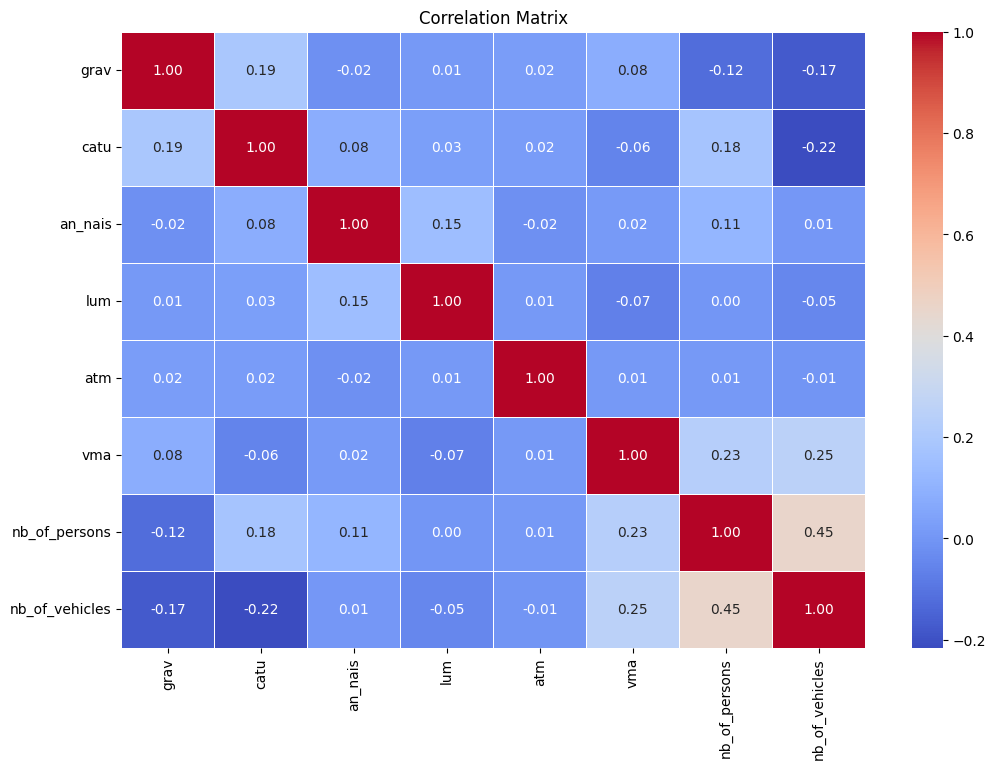

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [43]:
merged_data.columns

Index(['Num_Acc_x', 'id_usager', 'id_vehicule', 'num_veh_x', 'place', 'catu',
       'grav', 'sexe', 'an_nais', 'trajet', 'secu1', 'secu2', 'secu3', 'locp',
       'actp', 'etatp', 'catu_label', 'sexe_label', 'trajet_label',
       'grav_label', 'jour', 'mois', 'an', 'hrmn', 'lum', 'dep', 'com', 'agg',
       'int', 'atm', 'col', 'adr', 'lat', 'long', 'catr', 'voie', 'v1', 'v2',
       'circ', 'nbv', 'vosp', 'prof', 'pr', 'pr1', 'plan', 'lartpc', 'larrout',
       'surf', 'infra', 'situ', 'vma', 'nb_of_persons', 'nb_of_vehicles',
       'lum_category', 'surf_category', 'Num_Acc_y', 'num_veh_y', 'senc',
       'catv', 'obs', 'obsm', 'choc', 'manv', 'motor', 'occutc', 'catv_label'],
      dtype='object')